<a href="https://colab.research.google.com/github/ob3dd/Adult-Income-and-Wine-Quality-/blob/main/Adult_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Imports**

In [22]:
# Import Panda
import pandas as pd
# Import Numpy
import numpy as np
# Import Matplotlib
import matplotlib.pyplot as plt
# Import Seaborn
import seaborn as sns

pd.set_option('display.max_columns',100)
import warnings
warnings.filterwarnings('ignore')

##**Load Data**

In [23]:
fpath = '/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/adult.csv'
df = pd.read_csv(fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


##**Clean the Data**

###**Dropping Unnecessary Columns**

In [24]:
# Drop columns
columns_to_drop = ['fnlwgt', 'capital-loss', 'capital-loss', 'marital-status', 'race', 'educational-num']
df.drop(columns_to_drop, axis=1, inplace=True)

These columns aren't relevant to our data, so they will be dropped.

###**Removing Duplicates**

In [25]:
# Check for dulplicates
df.duplicated().sum()
print (f"There are {df.duplicated().sum()} duplicates in the dataset")

There are 9076 duplicates in the dataset


In [26]:
# Dropping Duplicates
df.drop_duplicates(inplace=True)

In [27]:
# Check for dulplicates
df.duplicated().sum()
print (f"There are {df.duplicated().sum()} duplicates in the dataset")

There are 0 duplicates in the dataset


###**Handling Missing Values**

In [28]:
# Checking for missing values
df.isna().sum()

age               0
workclass         0
education         0
occupation        0
relationship      0
gender            0
capital-gain      0
hours-per-week    0
native-country    0
income            0
dtype: int64

There are 0 missing values

## **Fixing Inconsistencies**

In [29]:
# Viewing all data types
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['workclass', 'education', 'occupation', 'relationship', 'gender',
       'native-country', 'income'],
      dtype='object')

In [30]:
# creating a for loop that loops through my string column
for col in str_cols:
  print(f"- Column = {col}")
  print(df[col].value_counts(dropna=False))
  print('\n\n')

- Column = workclass
Private             25976
Self-emp-not-inc     3690
Local-gov            2905
?                    2289
State-gov            1889
Self-emp-inc         1632
Federal-gov          1354
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64



- Column = education
HS-grad         11593
Some-college     8530
Bachelors        6600
Masters          2408
Assoc-voc        1901
Assoc-acdm       1540
11th             1527
10th             1231
7th-8th           915
Prof-school       796
9th               731
12th              605
Doctorate         570
5th-6th           497
1st-4th           241
Preschool          81
Name: education, dtype: int64



- Column = occupation
Prof-specialty       5448
Exec-managerial      5141
Sales                4480
Adm-clerical         4317
Craft-repair         4315
Other-service        4067
?                    2299
Machine-op-inspct    2235
Transport-moving     1955
Handlers-cleaners    1606
Farming-fishing      141

I have no knowledge of this company or the dataset, so I don't know what "?" signifies or is suppose to signify. We won't try to fix those.

In [31]:
# checking for inconsistent numeric features
df.describe()

,age,capital-gain,hours-per-week
count,39766.000000,39766.000000,39766.000000
mean,39.754313,1309.128351,40.715662
std,13.895102,8189.799545,13.186021
min,17.000000,0.000000,1.000000
25%,29.000000,0.000000,38.000000
50%,38.000000,0.000000,40.000000
75%,49.000000,0.000000,45.000000
max,90.000000,99999.000000,99.000000


In [32]:
# checking for inconsistent categorical features
df.describe(exclude= 'number')

,workclass,education,occupation,relationship,gender,native-country,income
count,39766,39766,39766,39766,39766,39766,39766
unique,9,16,15,6,2,42,2
top,Private,HS-grad,Prof-specialty,Husband,Male,United-States,<=50K
freq,25976,11593,5448,15893,26425,34805,29746


In [33]:
# checking for inconsistent categorical features
df.describe(exclude= 'object')

,age,capital-gain,hours-per-week
count,39766.000000,39766.000000,39766.000000
mean,39.754313,1309.128351,40.715662
std,13.895102,8189.799545,13.186021
min,17.000000,0.000000,1.000000
25%,29.000000,0.000000,38.000000
50%,38.000000,0.000000,40.000000
75%,49.000000,0.000000,45.000000
max,90.000000,99999.000000,99.000000


##**Visualizations**

###**Using Univariate Exploratory Visualizations for all features**

###**Catergorical Columns**

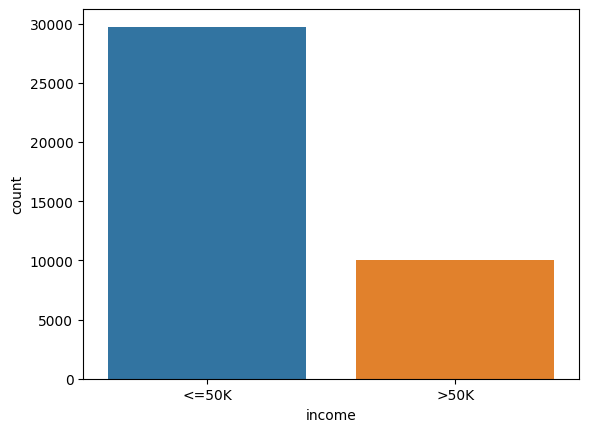

In [34]:
sns.countplot(data = df, x = 'income');

- Most individuals make less than 50K.

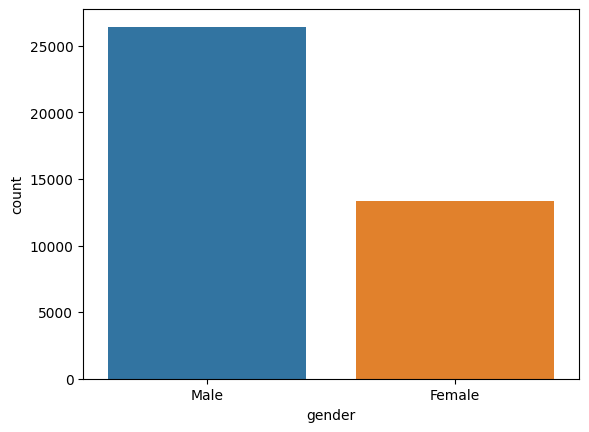

In [53]:
sns.countplot(data = df, x = 'gender');

- As seen in the chart above, Males are the genders to have incomes between both genders

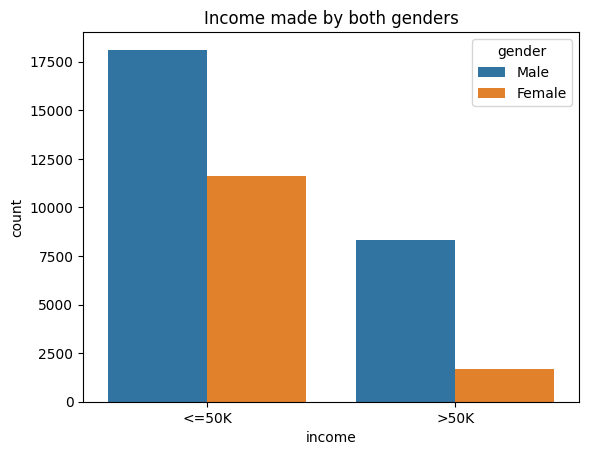

In [52]:
ax = sns.countplot(data=df, x="income", hue="gender")
plt.title("Income made by both genders")
plt.show()

Males are higher in both comparisons

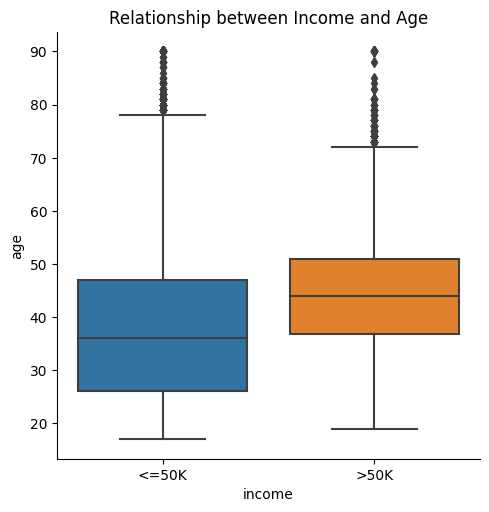

In [35]:
#Relationship between Income and Age

sns.catplot(data=df,x='income', y='age', kind= 'box', aspect=1)
plt.title('Relationship between Income and Age')
plt.show()

From the above plot, we can deduce that;
- Most of the people having income less than or equal to 50K are between age 28-48
- Most of the people having income more than 50K are between age 36-51

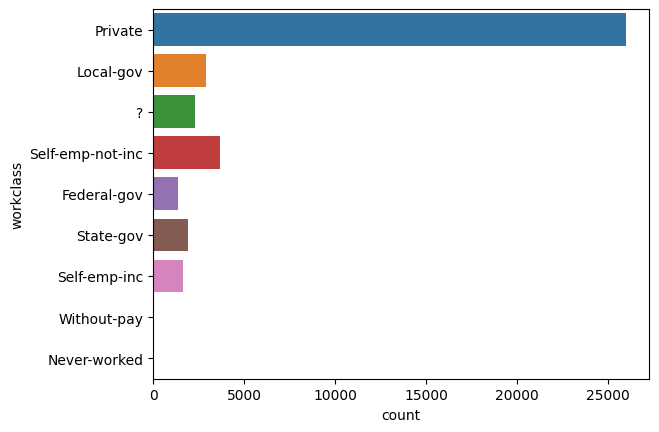

In [36]:
sns.countplot(data = df, y = 'workclass');

- Most individuals are private earners. Their incomes generated from any type of occupational activities or any income that is received apart from salary or any type of commission.
- Self Employed, Those paid by the local govt are the next top individual wuth high incomes
- The least are those whose income are from the Federal Govt

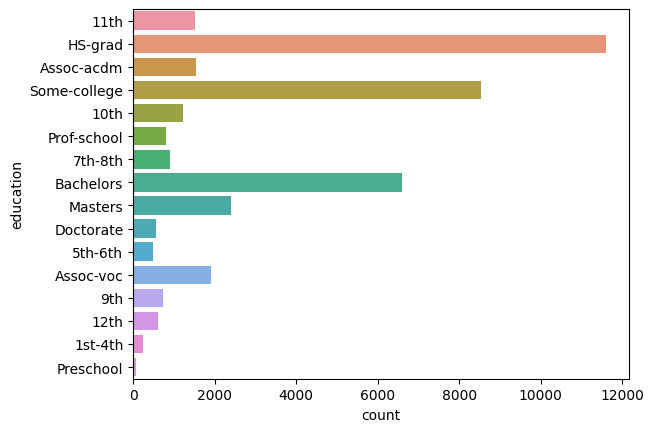

In [37]:
sns.countplot(data = df, y = 'education');

- High School Graduates are the highest with incomes coming into their pocket
- Preschool is the least

NB: This isn't a chart of those with the most money, it just gives a visual representation of the amount of individuals having incomes.

- Most individuals with incomes are married


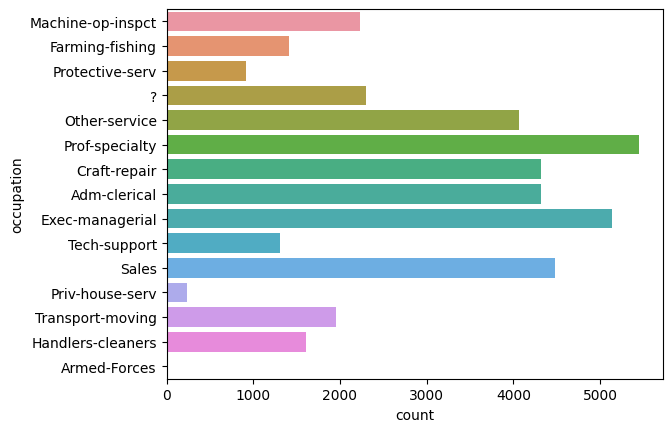

In [38]:
sns.countplot(data = df, y = 'occupation');

- Occupations most individuals covered were the ones with specialities
- The least was a Private house server.

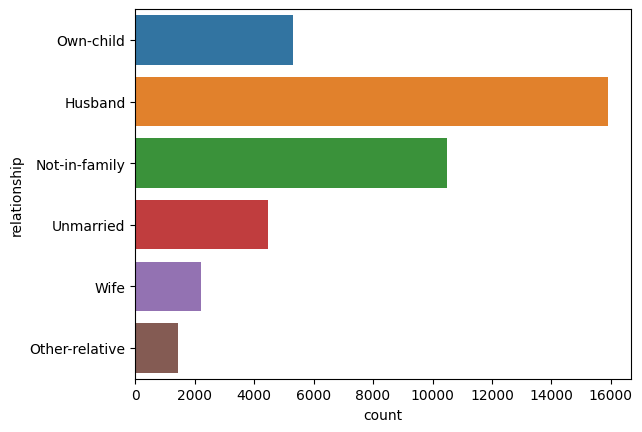

In [39]:
sns.countplot(data = df, y = 'relationship');

- The most relationship status of individuals who have incomes are known to be husbands.
- Wives(excluding "Others") were the least ones to have incomes in a household.

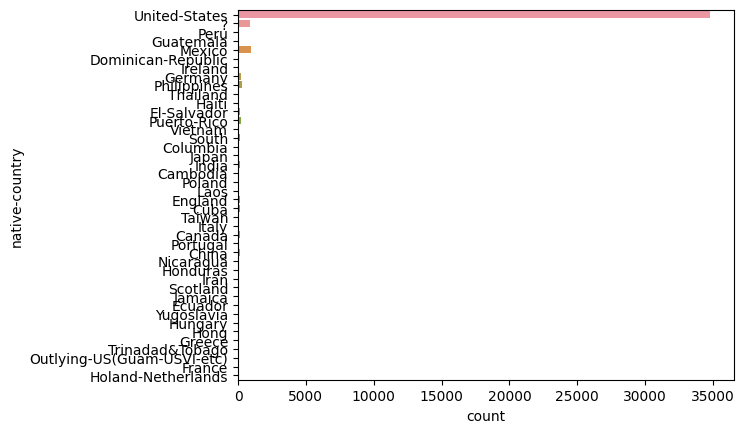

In [54]:
sns.countplot(data = df, y = 'native-country');

- Most of these individuals were from the USA.

###**Numerical Column**

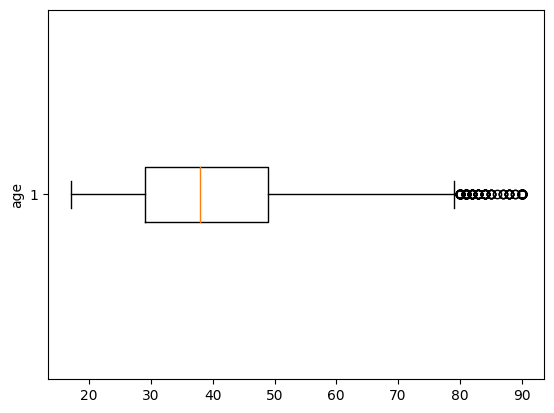

In [55]:
# making the boxplot
fig, ax = plt.subplots()
ax.boxplot(df['age'], vert = False);
ax.set_ylabel("age");

Most of the individuals were from the age 80-90.

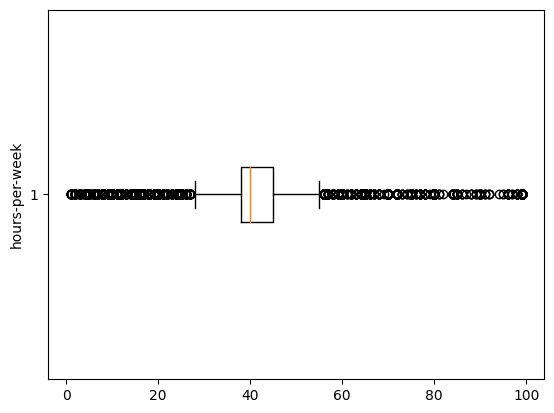

In [56]:
# making the boxplot
fig, ax = plt.subplots()
ax.boxplot(df['hours-per-week'], vert = False);
ax.set_ylabel("hours-per-week");

Most individuals put in over 40 hours every week.

##**Coorelations**

In [57]:
# Getting the correlations between my values
corr = df.corr(numeric_only = True)
corr.round(2)

,age,capital-gain,hours-per-week
age,1.00,0.07,0.03
capital-gain,0.07,1.00,0.08
hours-per-week,0.03,0.08,1.00


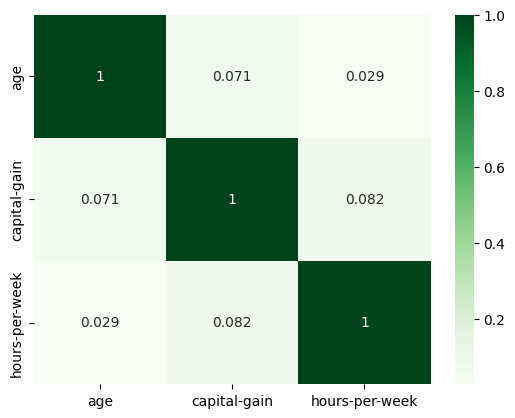

In [58]:
# Vizualizing the heatmap
sns.heatmap(corr, cmap = 'Greens', annot = True);

- There are no moderate or strong coorelations between our features.
- Since all of the values were below 0.3 in magnitude, we did not identify any relationships between variables in our dataset.

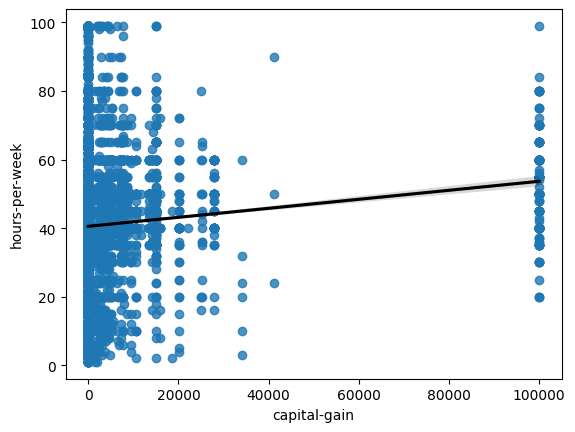

In [59]:
# Creating a scatterplot with a regression line
line_kws = dict(color='black')
ax = sns.regplot(data=df, x="capital-gain", y="hours-per-week",
                 line_kws=line_kws)

- Our plot is positively skewed.
- The higher hours people put in the higher capital gain. One could say the higher hours they put in, the higher money they received which led to them being able to invest and receive capital gains.

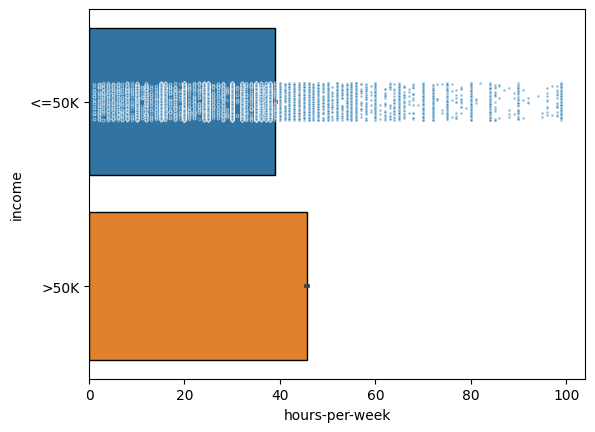

In [60]:
# Creating a countplot
ax = sns.barplot(data=df, y='income', x='hours-per-week', edgecolor='black')
sns.stripplot(data=df, x='hours-per-week', edgecolor='white',
              linewidth=.5, s=2,alpha=0.5) ;

- Adults who put in less than 40 hours received less than $50k income.
- Those with higher hours than 40 received over 50k income.

##**EDA FUNCTION**

In [61]:
def explore_categorical(df, x, fillna=True, placeholder = 'MISSING'):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=(6,4))
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")
  fig.tight_layout()

In [62]:
# Declaring required variables
x = "income"
y = "age"

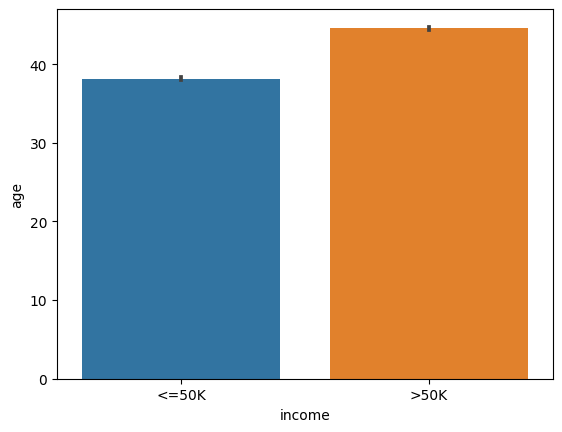

In [63]:
# Default Barplot
sns.barplot(data=df, x=x, y=y);

- Adults over the age of 40 make over 50k income
- Most adults under the age of 40 (roughly 39 and below) make lower than 50k

In [64]:
# Declaring a variable for my occupation column
x = "occupation"

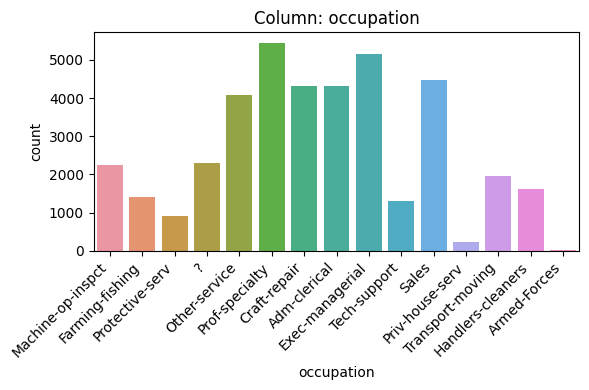

In [65]:
# Create figure with desired figsize
fig, ax = plt.subplots(figsize=(6,4))
# Plotting a count plot
sns.countplot(data=df, x=x, ax=ax)
# Rotate Tick Labels for long names
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# Add a title with the feature name included
ax.set_title(f"Column: {x}")
fig.tight_layout()